In [7]:
# importing the libraries
import dowhy
from causalgraphicalmodels import CausalGraphicalModel
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',35)
import sys
sys.path.append("../scripts/")
from plots import plot_distribution
import warnings
warnings.filterwarnings('ignore')
from dowhy import CausalModel
from IPython.display import Image, display

In [8]:
# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'WARN',
        },
    }
}
logging.config.dictConfig(DEFAULT_LOGGING)
# Disabling warnings output
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [9]:
df = pd.read_csv('/home/amon/Desktop/10Academy/industry-casualty/Data/clean_data.csv')
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [10]:
df_drop = df.drop(['Unnamed: 0'], axis=1)

## checking for the important features using the LogisticRegression ##

In [11]:
from sklearn.linear_model import LogisticRegression

X = df_drop.drop(['diagnosis',],axis=1)
y = df.diagnosis.values

print(X.shape)
print(y.shape)

(569, 30)
(569,)


Feature: 0, Score: 0.36317
Feature: 1, Score: 0.38770
Feature: 2, Score: 0.35111
Feature: 3, Score: 0.43556
Feature: 4, Score: 0.16176
Feature: 5, Score: -0.56260
Feature: 6, Score: 0.85990
Feature: 7, Score: 0.96222
Feature: 8, Score: -0.07617
Feature: 9, Score: -0.32219
Feature: 10, Score: 1.29103
Feature: 11, Score: -0.26893
Feature: 12, Score: 0.65989
Feature: 13, Score: 1.01250
Feature: 14, Score: 0.27717
Feature: 15, Score: -0.73628
Feature: 16, Score: -0.11053
Feature: 17, Score: 0.33351
Feature: 18, Score: -0.29590
Feature: 19, Score: -0.68092
Feature: 20, Score: 1.02936
Feature: 21, Score: 1.31459
Feature: 22, Score: 0.82332
Feature: 23, Score: 1.01059
Feature: 24, Score: 0.67073
Feature: 25, Score: -0.04466
Feature: 26, Score: 0.87330
Feature: 27, Score: 0.91196
Feature: 28, Score: 0.88790
Feature: 29, Score: 0.47983


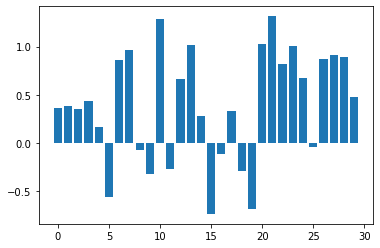

In [12]:
import matplotlib.pyplot as plt

log = LogisticRegression()
log.fit(X,y)
feature_importance = log.coef_[0]
for i,v in enumerate(feature_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

In [13]:
features = pd.DataFrame()
features['names'] = X.columns.to_list()
features['score'] = log.coef_[0]
features.head()

,names,score
0,radius_mean,0.363171
1,texture_mean,0.387703
2,perimeter_mean,0.351114
3,area_mean,0.435559
4,smoothness_mean,0.161765


In [14]:
f = features[features['score']>0]
f.sort_values(by='score',ascending=False)

,names,score
21,texture_worst,1.314593
10,radius_se,1.291035
20,radius_worst,1.029361
13,area_se,1.012501
23,area_worst,1.010594
7,concave points_mean,0.962222
27,concave points_worst,0.911958
28,symmetry_worst,0.887897
26,concavity_worst,0.873301
6,concavity_mean,0.859898


In [15]:
#Treatment = radius_mean > 18 likely to cause cancer tumor to be diagnosed as malignant
df_drop['high_radius'] = df_drop['radius_mean'].apply(lambda x: True if x > 18 else False)
df_drop['high_radius'] = df_drop['high_radius']

In [16]:
#we focus on these features
#high_radius = True, where radius mean >18
cols = f['names'].to_list()
cols.extend(['diagnosis','high_radius'])
training = df_drop[cols]
training.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,smoothness_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,high_radius
0,1.097064,-2.073335,1.269934,0.984375,1.568466,2.652874,2.532475,2.489734,2.833031,2.487578,-0.214002,0.660820,1.886690,-1.359293,2.303601,2.001237,1.307686,2.109526,2.296076,2.750622,1.937015,1,False
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.023846,0.548144,0.499255,0.263327,0.742402,-0.605351,0.260162,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.146749,1.087084,-0.243890,0.281190,1,False
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.363478,2.037231,1.228676,0.850928,1.181336,-0.297005,1.424827,1.511870,-0.023974,1.347475,1.456285,0.527407,0.854974,1.955000,1.152255,0.201391,1,False
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,1.915897,1.451707,0.326373,0.286593,-0.288378,0.689702,1.115007,-0.281464,0.133984,-0.249939,-0.550021,3.394275,1.989588,2.175786,6.046041,4.935010,1,False
4,1.750297,-1.151816,1.776573,1.826229,0.280372,1.371011,1.428493,1.270543,1.273189,1.190357,1.483067,1.144205,1.298575,-1.466770,1.338539,1.220724,0.220556,0.613179,0.729259,-0.868353,-0.397100,1,False


In [17]:
training.rename(columns={'concave points_worst':'concave_points_worst','concave points_se':'concave_points_se','concave points_mean':'concave_points_mean'},inplace=True)

In [18]:
training.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave_points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concave_points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis',
       'high_radius'],
      dtype='object')

## Causal graph ##

In [19]:

causal_graph = """
digraph{
radius_mean;
texture_mean;
perimeter_mean;
area_mean;
smoothness_mean;
concavity_mean;
concave_points_mean;
radius_se;
perimeter_se;
area_se;
smoothness_se;
concave_points_se;
radius_worst;
texture_worst;
perimeter_worst;
area_worst;
smoothness_worst;
concavity_worst;
concave_points_worst;
symmetry_worst;
fractal_dimension_worst;
U[label="Unobserved Confounders"];
radius_mean -> perimeter_mean;radius_mean -> area_mean;radius_mean -> smoothness_mean;radius_mean->high_radius;
concave_points_mean->concavity_mean;radius_se -> perimeter_se;radius_se -> area_se;radius_se -> smoothness_se;
radius_worst -> perimeter_worst;radius_worst -> area_worst;radius_worst -> smoothness_worst;concave_points_worst->concavity_worst;
radius_se -> perimeter_se;radius_se -> area_se;radius_se -> smoothness_se;radius_worst -> perimeter_worst;
radius_worst -> area_worst;radius_worst -> smoothness_worst;concave_points_worst->concavity_worst;

U->perimeter_mean;U->area_mean;U->smoothness_mean;U->texture_mean;U->concavity_mean;U->perimeter_se;U->area_se;U->smoothness_se;
U->smoothness_se;U->concave_points_se;U->perimeter_worst;U->area_worst;U->smoothness_worst;U->texture_worst;U->concavity_worst;
U->symmetry_worst;U->fractal_dimension_worst;U->high_radius;U->diagnosis;

texture_mean->diagnosis;perimeter_mean->diagnosis;area_mean->diagnosis;smoothness_mean->diagnosis;concavity_mean->diagnosis;
perimeter_se->diagnosis;area_se->diagnosis;smoothness_se->diagnosis;concave_points_se->diagnosis;high_radius->diagnosis;
texture_worst->diagnosis;perimeter_worst->diagnosis;area_worst->diagnosis;smoothness_worst->diagnosis;
concavity_worst->diagnosis;concave_points_worst->diagnosis;symmetry_worst->diagnosis;fractal_dimension_worst->diagnosis;
}
"""

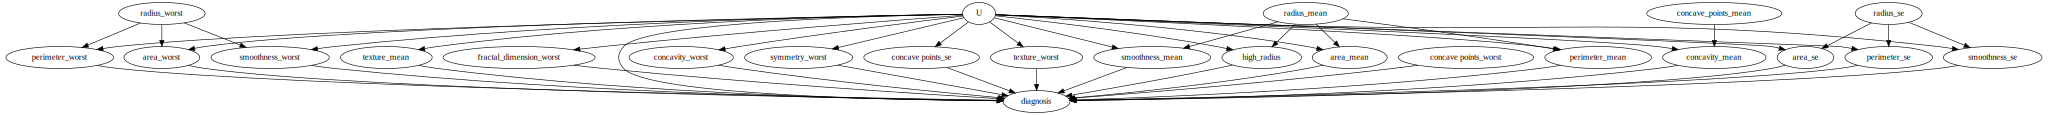

In [20]:
#area and perimeter functions of radius
from causalgraphicalmodels import CausalGraphicalModel
causal = CausalGraphicalModel(
    nodes=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave_points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis',
       'high_radius','U'],
    edges=[
        ("radius_mean", "perimeter_mean"), 
        ("radius_mean", "area_mean"),
        ("radius_mean","smoothness_mean"),
        ("concave_points_mean","concavity_mean"),
        ("radius_mean","high_radius"),
        ("radius_se", "perimeter_se"), 
        ("radius_se", "area_se"),
        ("radius_se","smoothness_se"),
        ("radius_worst", "perimeter_worst"), 
        ("radius_worst", "area_worst"),
        ("radius_worst","smoothness_worst"),
        ("concave_points_worst","concavity worst"),
        ("U","perimeter_mean"),
        ("U","area_mean"),
        ("U","texture_mean"),
        ("U","smoothness_mean"),
        ("U","concavity_mean"),
        ("U","perimeter_se"),
        ("U","area_se"),
        ("U","concave points_se"),
        ("U","smoothness_se"),
        ("U","perimeter_worst"),
        ("U","area_worst"),
        ("U","texture_worst"),
        ("U","smoothness_worst"),
        ("U","concavity_worst"),
        ("U","symmetry_worst"),
        ("U","fractal_dimension_worst"),
        ("U","high_radius"),
        ("U","diagnosis"),
        ("high_radius","diagnosis"),
        ("perimeter_mean","diagnosis"),
        ("area_mean","diagnosis"),
        ("texture_mean","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("perimeter_se","diagnosis"),
        ("area_se","diagnosis"),
        ("smoothness_se","diagnosis"),
        ("concavity_se","diagnosis"),
        ("smoothness_se","diagnosis"),
        ("concave points_se","diagnosis"),
        ("concave points_worst","diagnosis"),
        ("perimeter_worst","diagnosis"),
        ("area_worst","diagnosis"),
        ("texture_worst","diagnosis"),
        ("smoothness_worst","diagnosis"),
        ("concavity_worst","diagnosis"),
        ("smoothness_worst","diagnosis"),
        ("symmetry_worst","diagnosis"),
        ("fractal_dimension_worst","diagnosis")
    ]
)
# draw return a graphviz `dot` object, which jupyter can render
causal.draw()

In [21]:
model= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='high_radius',
        outcome='diagnosis')

In [22]:
model.view_model()
#display(Image(filename="causal_model.png"))

In [36]:
estimands = model.identify_effect()
print(estimands)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(diagnosis|smoothness_se,concavity_mean,area_se,text
d[high_radius]                                                                

                                                                              
ure_mean,smoothness_worst,radius_worst,concave_points_worst,perimeter_worst,sy
                                                                              

                                                                              
mmetry_worst,radius_se,area_mean,texture_worst,concave_points_mean,fractal_dim
                                                                              

                                                  